<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/data-cleaning/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
#https://www.kaggle.com/datasets/haseebindata/student-performance-predictions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [239]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/learnbay-ds-ml-course/datasets/student_performance.csv')

In [240]:
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


# Undestand the structure of the data

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


There are 9 columns and 10 rowns. There are 4 categorical columns and 5 numerical columns.

# Check Null values

In [242]:
data.isna().sum()

,0
StudentID,0
Name,0
Gender,0
AttendanceRate,0
StudyHoursPerWeek,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0


As you can see from above statement, there are no missing values hence no need to drop or impute missing values

In [243]:
# Set seaborn environment
sns.set()

# Plot distribution of Male and Female

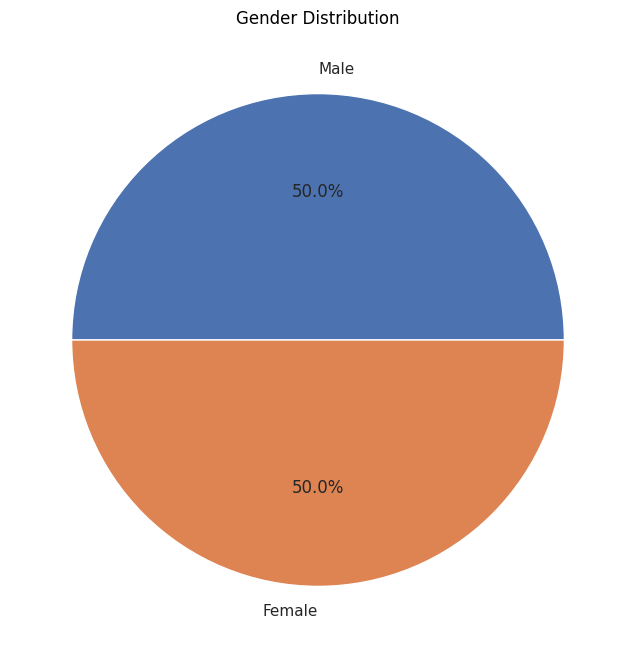

In [244]:
plt.figure(figsize=(8, 8))
plt.pie(x=data['Gender'].value_counts().values, labels=data['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution', fontdict={'color':  'black','alpha':1})
plt.show()

Above plot indicate thta there is equal participation of Male and Female

# Gender-wise Parental support

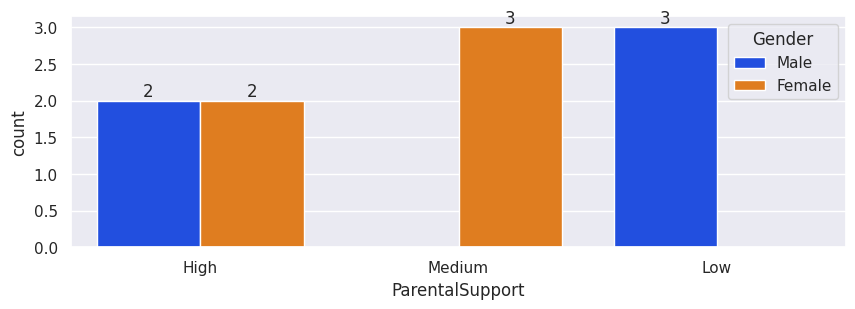

In [245]:
f, ax = plt.subplots(1, 1, figsize=(10, 3))
sns.countplot(ax = ax, x='ParentalSupport', hue='Gender', data=data, palette='bright')
for container in ax.containers:
  ax.bar_label(container)
f.show()

Above plot indicate that female students have more parental support than male students

#Average score of Male and Female students

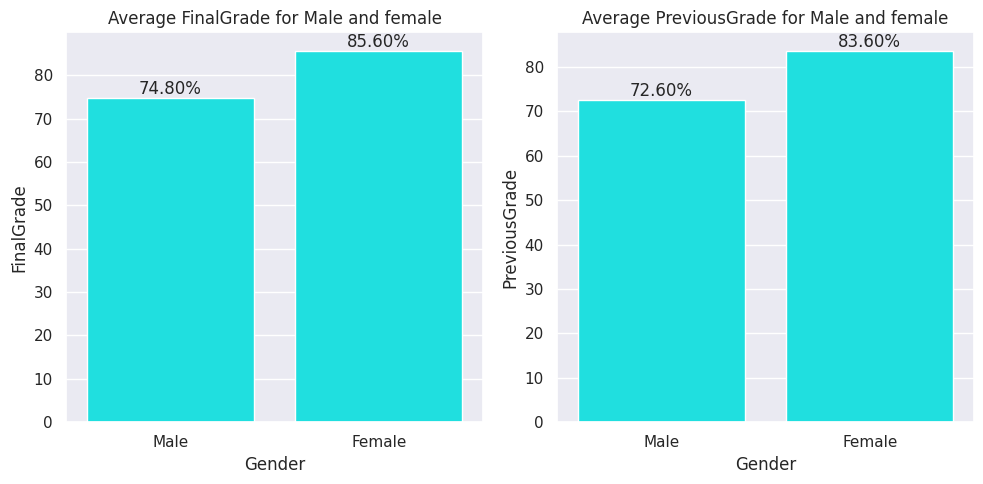

In [246]:
f, ax = plt.subplots(1, 2, figsize =(10, 5))
sns.barplot(ax=ax[0], data = data, x='Gender', y = 'FinalGrade', ci=False, color="cyan")
ax[0].bar_label(ax[0].containers[0], fmt='%.2f%%')
ax[0].set_title('Average FinalGrade for Male and female')

sns.barplot(ax=ax[1], data = data, x='Gender', y = 'PreviousGrade', ci=False, color="cyan")
ax[1].bar_label(ax[1].containers[0], fmt='%.2f%%')
ax[1].set_title('Average PreviousGrade for Male and female')

f.tight_layout()
f.show()

Average Grades for the females are better than male hence female students have perform better in exam

# Distribution of grades for PreviousGrade vs FinalGrade

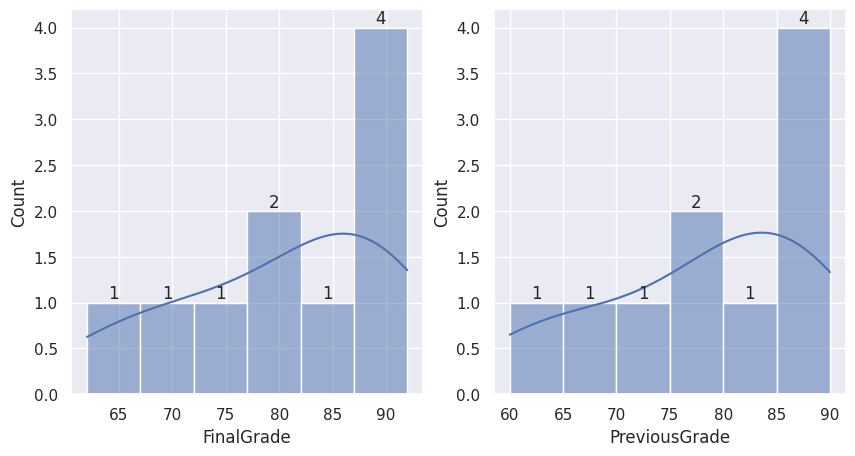

In [247]:
# Distribution of grades PreviousGrade vs FinalGrade
f, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(ax =ax[0], x='FinalGrade', data = d, binwidth=5, kde=True)
ax[0].bar_label(ax[0].containers[0])

sns.histplot(ax =ax[1], x='PreviousGrade', data = d, binwidth=5, kde=True)
ax[1].bar_label(ax[1].containers[0])
f.show()

Above plot indicate that the overall performance of students is same for Previous year as well as current year

# Plot the correlation fo features with FinalGrades

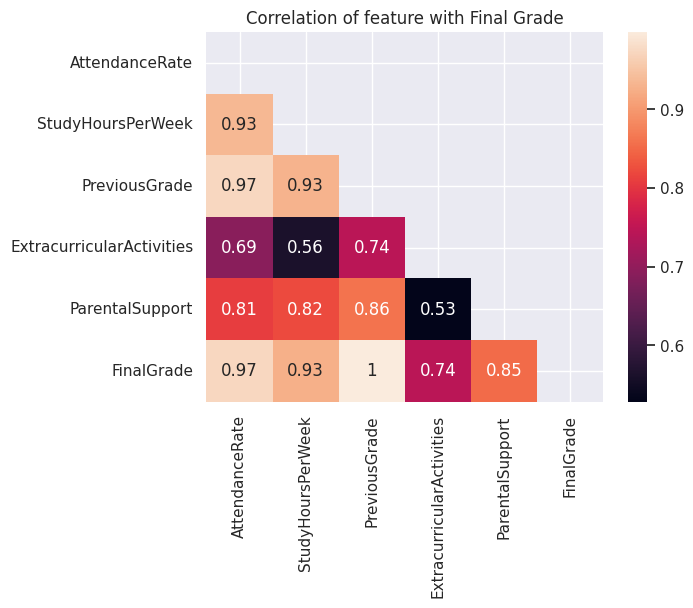

In [248]:
data.ParentalSupport = data.ParentalSupport.replace({'High': 3,'Medium': 2, 'Low': 1})
d = data[['AttendanceRate','StudyHoursPerWeek',	'PreviousGrade',	'ExtracurricularActivities','ParentalSupport','FinalGrade']]
sns.heatmap(d.corr()
, annot =True, mask=np.triu(d.corr()))
plt.title('Correlation of feature with Final Grade')
plt.show()

#Conclusion:

- **Participation**: There is equal participation of Male and female Students.
- **Parental Support**: Female students have very good support from parents compared to Male studentds.
- **Average Grades**: Average Score of the female students is better than the Male students.
- **PreviousGrade**: It has strong correlation with FinalGrade, student who has secored good scrore in the previous is more likely will score same or better the final
- **PreviousGrade vs FinalGrade**: On average performance of the students is same or better compare to previous grade.
- **AttendanceRate**: It has strong correlation with FinalGrade, student who attend the classes regularly is more likely score better in trhe exam
- **StudyHoursPerWeek**: It has strong correlation with FinalGrade, student who studies more will score better in the exam.
- **ParentalSupport**: ParentalSupport is also very critical score better in the exam, more the support of parent better the result.
- **ExtracurricularActivities**: ExtracurricularActivities is also one of the decisive factor to score in the examp.